In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df = pd.read_csv('/home/machine/Desktop/ML_Lab/wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df_shuffled = df.sample(frac=1, random_state=42)

In [7]:
df_shuffled.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
19,1,13.64,3.10,2.56,15.2,116,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845
45,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080
140,3,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
30,1,13.73,1.50,2.70,22.5,101,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285
67,2,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510


In [8]:
X = df.drop('Wine',axis=1)
y = df['Wine']
n_samples,n_features = X.shape
print('n_samples: ',n_samples,' n_features: ',n_features)

n_samples:  178  n_features:  13


In [9]:
%matplotlib inline

### Initial Data Visualization

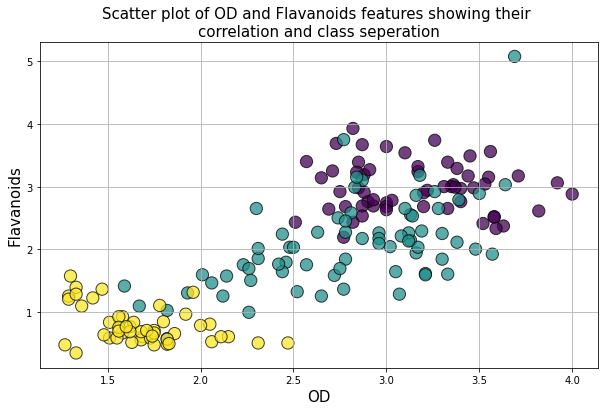

In [14]:
plt.figure(figsize=(10,6))
plt.scatter(df['OD'],df['Flavanoids'],c=df['Wine'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of OD and Flavanoids features showing their \ncorrelation and class seperation",fontsize=15)
plt.xlabel("OD",fontsize=15)
plt.ylabel("Flavanoids",fontsize=15)
plt.show()

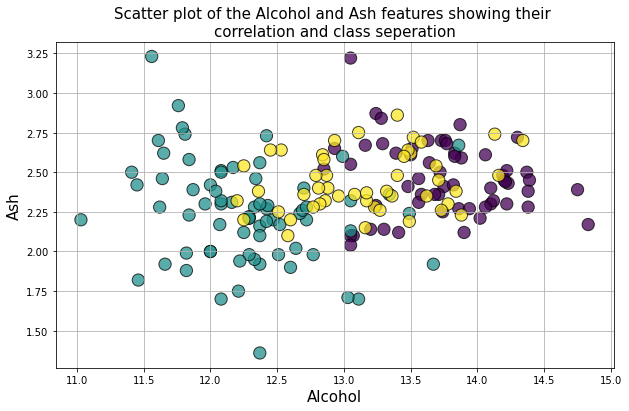

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(df['Alcohol'],df['Ash'],c=df['Wine'],edgecolors='k',alpha=0.75,s=150)
plt.grid(True)
plt.title("Scatter plot of the Alcohol and Ash features showing their \ncorrelation and class seperation",fontsize=15)
plt.xlabel("Alcohol",fontsize=15)
plt.ylabel("Ash",fontsize=15)
plt.show()

### Data Preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

In [19]:
from sklearn.decomposition import PCA
pca = PCA()
final_wine = pca.fit_transform(X)  #performing eigen decomposition followed by projection
print(final_wine[:10])

[[ 3.31675081e+00 -1.44346263e+00 -1.65739045e-01 -2.15631188e-01
   6.93042841e-01 -2.23880128e-01  5.96426546e-01  6.51390947e-02
   6.41442706e-01  1.02095585e+00 -4.51563395e-01  5.40810414e-01
  -6.62386309e-02]
 [ 2.20946492e+00  3.33392887e-01 -2.02645737e+00 -2.91358318e-01
  -2.57654635e-01 -9.27120244e-01  5.37756128e-02  1.02441595e+00
  -3.08846753e-01  1.59701372e-01 -1.42657306e-01  3.88237741e-01
   3.63650247e-03]
 [ 2.51674015e+00 -1.03115130e+00  9.82818670e-01  7.24902309e-01
  -2.51033118e-01  5.49276047e-01  4.24205451e-01 -3.44216131e-01
  -1.17783447e+00  1.13360857e-01 -2.86672847e-01  5.83573183e-04
   2.17165104e-02]
 [ 3.75706561e+00 -2.75637191e+00 -1.76191842e-01  5.67983308e-01
  -3.11841591e-01  1.14431000e-01 -3.83337297e-01  6.43593498e-01
   5.25444215e-02  2.39412605e-01  7.59584312e-01 -2.42019563e-01
  -3.69483531e-01]
 [ 1.00890849e+00 -8.69830821e-01  2.02668822e+00 -4.09765788e-01
   2.98457503e-01 -4.06519601e-01  4.44074463e-01  4.16700470e-01


In [22]:
#displaying the variance captured by PCA
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)

[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


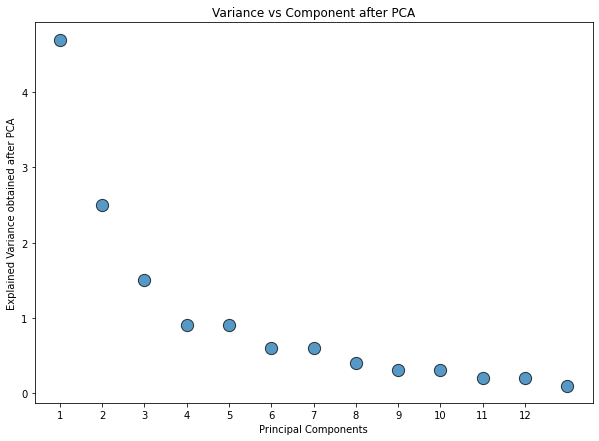

In [34]:
#Rounding off the variances to fewer decimal places
rounded_var=np.round(pca.explained_variance_,1)
plt.figure(figsize=(10,7))
pca_components = [i+1 for i in range(len(rounded_var))]
plt.scatter(pca_components,rounded_var,edgecolors='k',alpha=0.75,s=150)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance obtained after PCA')
plt.title('Variance vs Component after PCA')
plt.xticks(np.arange(pca_components[0],pca_components[len(pca_components)-1],1))
plt.show()

In [29]:
#Variance captured using first two principal components
var = np.sum(pca.explained_variance_[0:2])
print(np.round(var,2))
var_percentage = np.sum(pca.explained_variance_ratio_[0:2])*100
print(np.round(var_percentage,2),'%')

7.24
55.41 %


### Data Visualization after PCA

Text(0, 0.5, 'The second principle component')

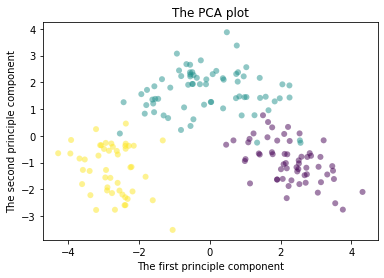

In [35]:
figure = plt.figure()
ax = plt.gca()
plt.scatter(final_wine[:,0],final_wine[:,1], c=df['Wine'], edgecolor='none', alpha=0.5)
ax.set_title("The PCA plot")
ax.set_xlabel("The first principle component")
ax.set_ylabel("The second principle component")

Text(0, 0.5, 'The fourth principal component')

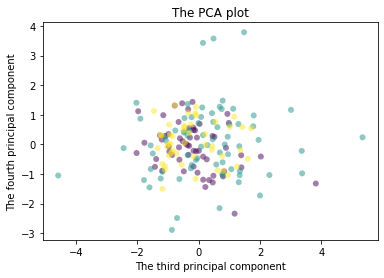

In [36]:
figure = plt.figure()
ax = plt.gca()
plt.scatter(final_wine[:,2],final_wine[:,3], c=df['Wine'], edgecolor='none', alpha=0.5)
ax.set_title("The PCA plot")
ax.set_xlabel("The third principal component")
ax.set_ylabel("The fourth principal component")